In [ ]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from citipy import citipy
from datetime import datetime
import requests
import csv
import time
from time import sleep
import openweathermapy.core as owm
from pprint import pprint

In [2]:
# API Google key
from config2 import gkey

In [3]:
# API OWM key
from config3 import OWM_key

In [4]:
# Import data into a pandas DataFrame
cities_pd = pd.read_csv("worldcities.csv")

# Preview the data
cities_pd.head()

,Country,City,Latitude,Longitude
0,ad,andorra la vella,42.500000,1.516667
1,ad,canillo,42.566667,1.600000
2,ad,encamp,42.533333,1.583333
3,ad,la massana,42.550000,1.516667
4,ad,les escaldes,42.500000,1.533333


In [5]:
# select 500 cities
selected_cities = cities_pd.sample(n=500)

selected_cities.head()

,Country,City,Latitude,Longitude
13682,gr,karousades,39.780833,19.741111
4098,br,tangua,-22.733333,-42.716667
24878,mx,xico,19.416667,-97.000000
16106,hu,tomorkeny,46.617161,20.043569
42737,us,somers,41.985278,-72.446667


In [56]:
all_cities_details = []

for index, row in selected_cities.iterrows():
    city = citipy.nearest_city(row["Latitude"], row["Longitude"])
    settings = {"units": "imperial", "appid": OWM_key}
    row_counts = 0

#for index, row in all_cities_details.iterrows():
time.sleep(1)
# API calls
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
url = base_url + "lat=" + str(row["Latitude"]) + "&lon=" + str(row["Longitude"]) + "&appid=" + OWM_key + "&units=" +units
print(url)
    
result = requests.get(url).json()
#print(result)
print("Pulling the city nr " + str(row_counts))
print(url)
row_counts += 1
try:
        data = owm.get_current(f"{city.city_name},{city.country_code}", **settings)
        city_details = {
            "name": city.city_name,
            "lat": data["coord"]["lat"],
            "lon": data["coord"]["lon"],
            "wind": data["wind"]["speed"],
            "temperature": data["main"]["temp"],
            "humidity": data["main"]["humidity"],
            "clouds": data["clouds"]["all"]
        }
        all_cities_details.append(city_details)
except:
    pass
#all_cities_details

http://api.openweathermap.org/data/2.5/weather?lat=49.691666999999995&lon=8.458611&appid=96b0ac2a3e3e0b6a0b172be8179d6152&units=imperial
Pulling the city nr 0
http://api.openweathermap.org/data/2.5/weather?lat=49.691666999999995&lon=8.458611&appid=96b0ac2a3e3e0b6a0b172be8179d6152&units=imperial


In [44]:
all_cities_pd = pd.DataFrame(all_cities_details)
all_cities_pd.head()

,clouds,humidity,lat,lon,name,temperature,wind
0,20,78,-22.73,-42.71,tangua,81.82,8.05
1,8,58,19.42,-97.01,xico,69.26,3.38
2,0,84,46.62,20.04,tomorkeny,38.68,6.93
3,90,24,41.33,-73.69,somers,42.60,4.70
4,56,94,50.19,27.56,poninka,27.45,6.29


In [15]:
selected_cities.to_csv("worldweather.csv", index=False)

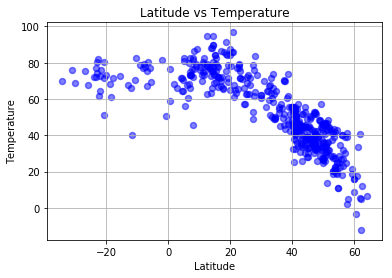

In [27]:
# latitude vs temperature
plt.scatter(all_cities_pd["lat"], all_cities_pd["temperature"], alpha=0.5, facecolor="blue", linewidth = 1.4)
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("Latvtemp.png")
plt.grid()
plt.show()

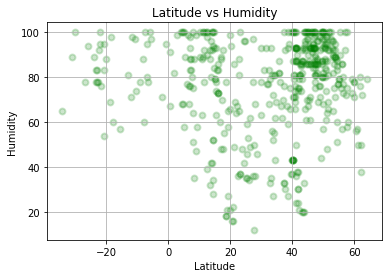

In [20]:
# latitude vs humidity
plt.scatter(all_cities_pd["lat"], all_cities_pd["humidity"], alpha=0.2, facecolor="green", linewidth = 1.9)
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Latvhumdty.png")
plt.grid()
plt.show()

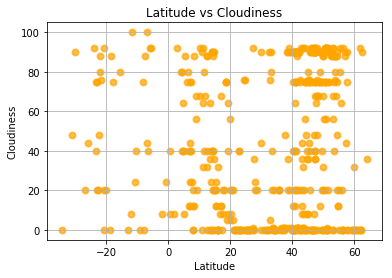

In [22]:
# latitude vs cloudiness
plt.scatter(all_cities_pd["lat"], all_cities_pd["clouds"], alpha=0.7, facecolor="orange", linewidth = 1.9)
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Latvclouds.png")
plt.grid()
plt.show()

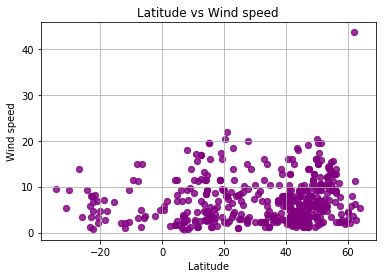

In [23]:
# latitude vs wind
plt.scatter(all_cities_pd["lat"], all_cities_pd["wind"], alpha=0.8, facecolor="purple", linewidth = 1.3)
plt.title("Latitude vs Wind speed")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.savefig("Latvwind.png")
plt.grid()
plt.show()